In [1]:
%%capture
from re import sub
from pandas import DataFrame, ExcelWriter
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *

from sys import path 
path.insert(0, '../core/')

from agyw import AgywPrev, AgywPrevCommune
from active import actif_served as AGYW_ACTIF


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

date_du_jour = datetime.today().strftime("%d_%m_%Y")

In [2]:
%%capture
datim = AgywPrev()

In [3]:
datim.total_mastersheet 
datim.total_dreams_valid
datim.who_am_i
datim.total_datimI
datim.total_datimII
datim.total_datimIII
datim.total_datimIV
datim.total_datim_general
AgywPrev.datim_titleI()
datim.datim_agyw_prevI()
AgywPrev.datim_titleII()
datim.datim_agyw_prevII()
AgywPrev.datim_titleIII()
datim.datim_agyw_prevIII()
AgywPrev.datim_titleIV()
datim.datim_agyw_prevIV()


16277

15974

'DATIM'

6556

7232

1977

209

15974

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services/interventions but no additional services/interventions.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,1640,1119,986,910,4655
2,20-24,603,349,435,514,1901


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services/interventions AND at least one secondary service/intervention.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,2593,1480,1025,257,5355
1,15-19,266,159,472,149,1046
2,20-24,86,130,477,138,831


'Number of individual AGYW that have completed at least one DREAMS service/intervention but not the full primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,472,259,106,25,862
1,15-19,333,240,142,56,771
2,20-24,105,101,101,37,344


'Number of AGYW that have started a DREAMS service/intervention but have not yet completed it.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,80,20,6,3,109
1,15-19,37,23,10,4,74
2,20-24,17,6,0,3,26


In [4]:
%%capture
def name_handler(s):
    s = sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespace with a single dash
    s = sub(r"\s+", '_', s)
    return s

datimcommunes = []

for columns in AGYW_ACTIF.commune.unique():
    globals()[f"datim_{name_handler(columns)}"] = AgywPrevCommune(f"{columns}")
    datimcommunes.append(globals().get(f"datim_{name_handler(columns)}"))


for dcommunes in datimcommunes:
  dcommunes.total_mastersheet 
  dcommunes.total_dreams_valid
  dcommunes.who_am_i
  dcommunes.total_datimI
  dcommunes.total_datimII
  dcommunes.total_datimIII
  dcommunes.total_datimIV
  dcommunes.total_datim_general
  AgywPrevCommune.datim_titleI()
  dcommunes.datim_agyw_prevI()
  AgywPrevCommune.datim_titleII()
  dcommunes.datim_agyw_prevII()
  AgywPrevCommune.datim_titleIII()
  dcommunes.datim_agyw_prevIII()
  AgywPrevCommune.datim_titleIV()
  dcommunes.datim_agyw_prevIV()
  print(" ")
  print(" ")
  print(" ")
  print(" ")

15974

(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'AGYW_PREV datim indicator  and the periodic target')

Text(0.0, 9500.0, '19000')

Text(1.0, 7987.0, '15974')

Text(-80, -20, 'source: HIVHaiti')

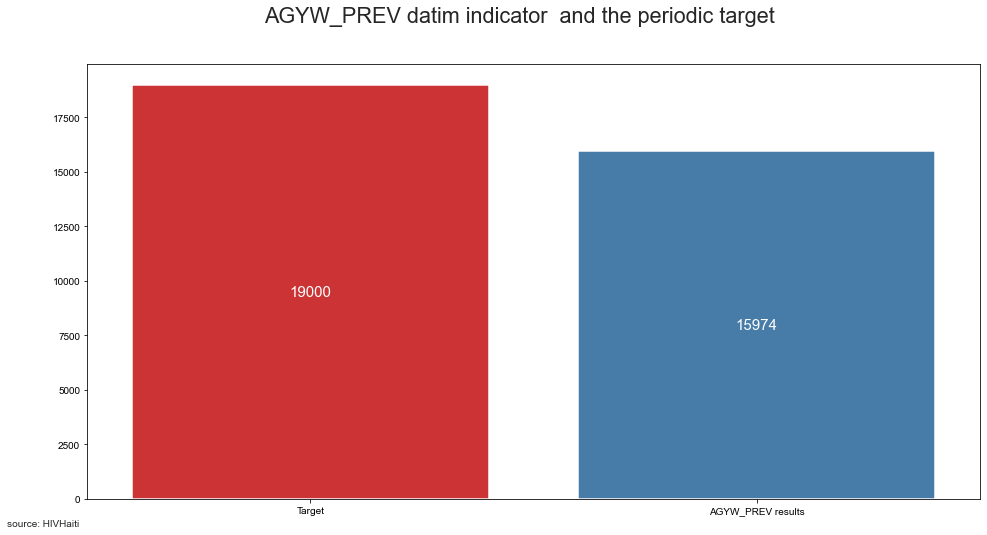

In [5]:



datim.total_datim_general
target= 19000

data_plot = DataFrame({"state":["Target","AGYW_PREV results"],
                            "data": [target,datim.total_datim_general]                        
})


plt.subplots(figsize=(16,8))
sns.set_theme(style="whitegrid", context="talk")
sns.set_style("darkgrid")
sns.set_palette('Set1')
splot = sns.barplot(x="state",y="data",data=data_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW_PREV datim indicator  and the periodic target")
for p in splot.patches:
    height = p.get_height()
    plt.text(
                p.get_x() + p.get_width()/2, 
                0.5*p.get_height() + p.get_y(),
                '{:1.0f}'.format(height), 
                ha='center', va='center',
                size=15,
                fontdict=dict(color="white")
            )
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)
plt.savefig("agyw_prev_evolution",dpi=1000)

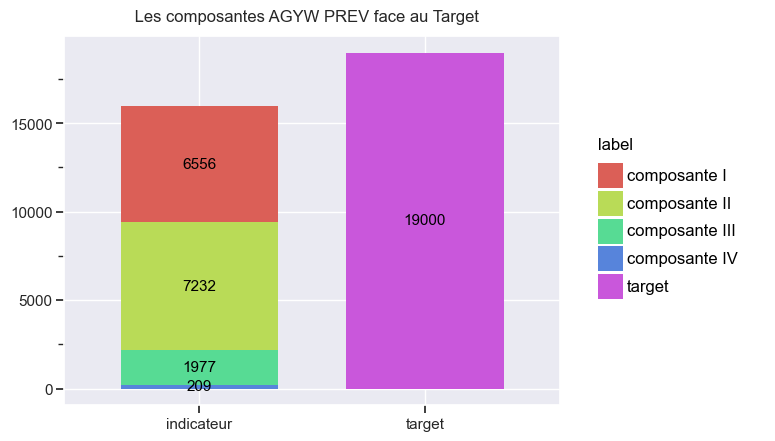

<ggplot: (318056839)>

/usr/local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: composante_agywprev.png


In [6]:
stack_data = DataFrame( 
                  {     
                        "supp":["target","indicateur","indicateur","indicateur",'indicateur'],
                        "label": ["target","composante I","composante II","composante III", 'composante IV'],
                        "data": [target,datim.total_datimI,
                                datim.total_datimII,
                                datim.total_datimIII,datim.total_datimIV]
})

p = (ggplot(stack_data,aes(x="supp",y="data",fill="label",width=0.7)) 
 + geom_bar(position=position_stack(vjust=0.5),stat="identity")
 + geom_text(aes(label="data"),position=position_stack(vjust=0.5))
 + ggtitle(" Les composantes AGYW PREV face au Target")
 + xlab("")
 +ylab("")
 +labs(caption =  "HIVHaiti")
 + theme_seaborn()
)
p
ggsave(plot=p,filename="composante_agywprev.png",dpi=1000)

In [7]:
usaid_verification = ExcelWriter(f"./tables_verification/datim_verification.xlsx",engine="xlsxwriter")
datim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")
datim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")
datim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")
datim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")
datim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")
usaid_verification.save()

""" usaid_verification = ExcelWriter(f"./tables_verification/Q3/datim_verification_{date_du_jour}.xlsx",engine="xlsxwriter")
datim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")
datim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")
datim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")
datim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")
datim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")
usaid_verification.save() """ 

""" usaid_verification = ExcelWriter(f"./tables_verification/Q2/datim_verification_{date_du_jour}.xlsx",engine="xlsxwriter")
datim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")
datim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")
datim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")
datim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")
datim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")
usaid_verification.save() """



""" usaid_verification = ExcelWriter(f"./tables_verification/special/datim_verification_{date_du_jour}.xlsx",engine="xlsxwriter")
datim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")
datim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")
datim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")
datim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")
datim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")
usaid_verification.save() """  

' usaid_verification = ExcelWriter(f"./tables_verification/Q3/datim_verification_{date_du_jour}.xlsx",engine="xlsxwriter")\ndatim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")\ndatim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")\ndatim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")\ndatim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")\ndatim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")\nusaid_verification.save() '

' usaid_verification = ExcelWriter(f"./tables_verification/Q2/datim_verification_{date_du_jour}.xlsx",engine="xlsxwriter")\ndatim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")\ndatim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")\ndatim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")\ndatim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")\ndatim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")\nusaid_verification.save() '

' usaid_verification = ExcelWriter(f"./tables_verification/special/datim_verification_{date_du_jour}.xlsx",engine="xlsxwriter")\ndatim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")\ndatim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")\ndatim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")\ndatim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")\ndatim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")\nusaid_verification.save() '